In [3]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [4]:
#Generate example time series data
np.random.seed(0)
dates = pd.date_range(start='2023-01-01', periods=100, freq='D')
values = np.cumsum(np.random.randn(100))
df = pd.DataFrame({'Date': dates, 'Value': values})
df.set_index('Date', inplace=True)

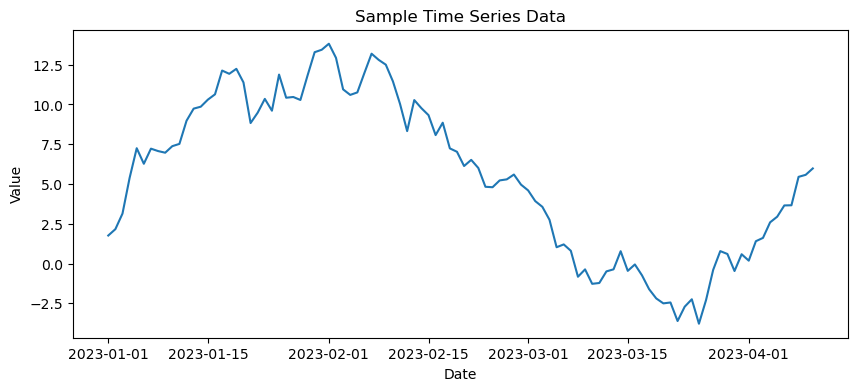

In [5]:
#Plot the time series data
plt.figure(figsize=(10, 4))
plt.plot(df.index, df['Value'])
plt.title('Sample Time Series Data')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

In [6]:
#Decompose the time series into trend, seasonality, and residual components
decomposition = sm.tsa.seasonal_decompose(df['Value'], model='additive')
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

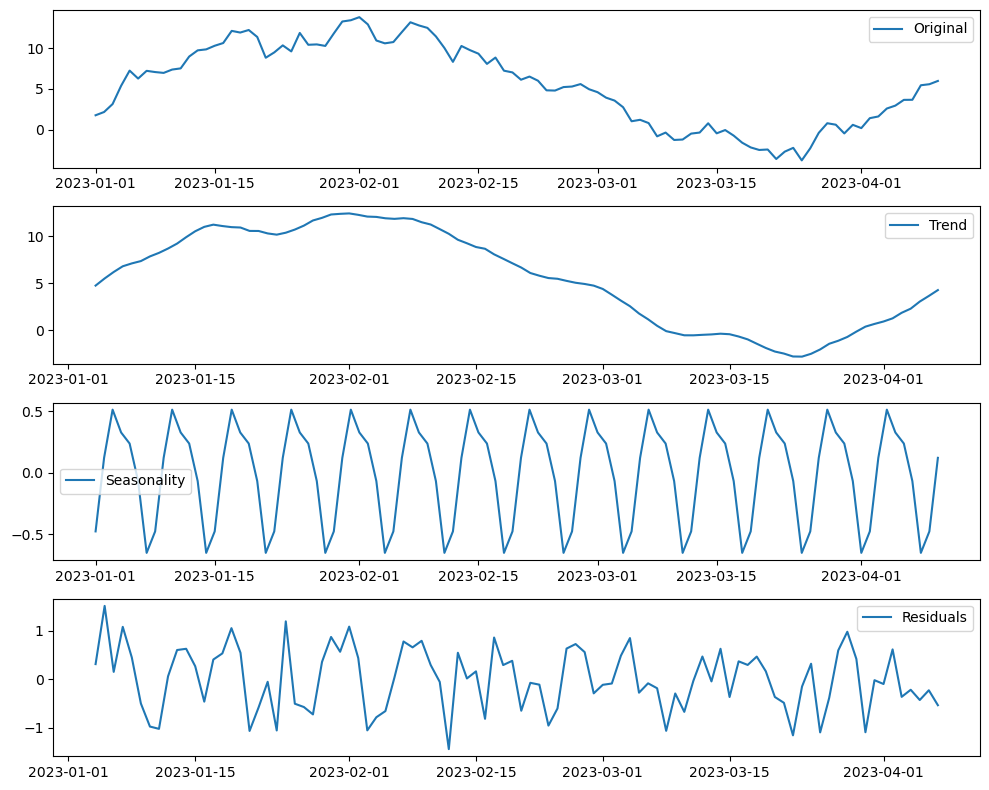

In [7]:
#Plot the decomposed components
plt.figure(figsize=(10, 8))
plt.subplot(411)
plt.plot(df['Value'], label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

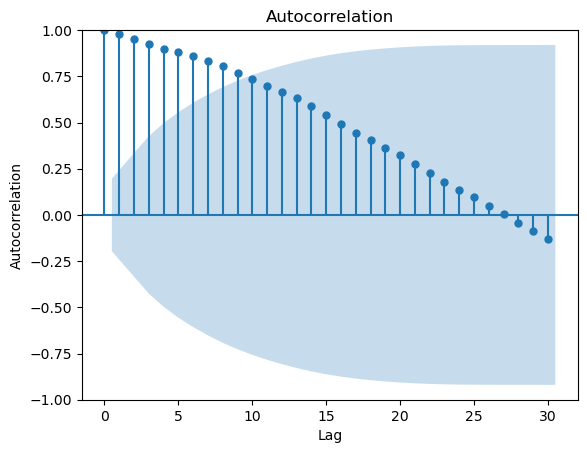

In [8]:
#Perform autocorrelation analysis
sm.graphics.tsa.plot_acf(df['Value'].values, lags=30)
plt.title('Autocorrelation')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

/Users/robertwrobel/anaconda3/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


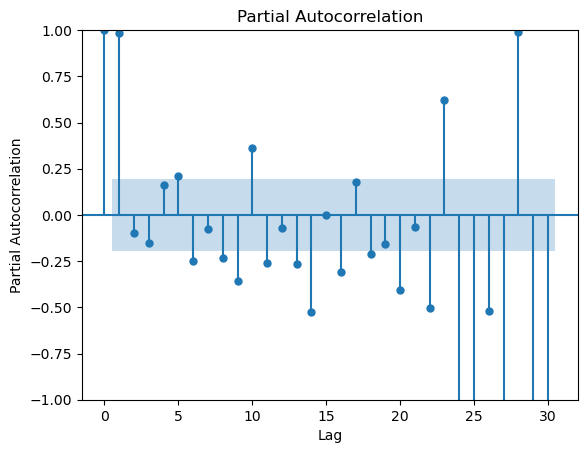

In [9]:
#Perform partial autocorrelation analysis
sm.graphics.tsa.plot_pacf(df['Value'].values, lags=30)
plt.title('Partial Autocorrelation')
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.show()

In [10]:
#Perform time series forecasting using ARIMA model
model = sm.tsa.ARIMA(df['Value'], order=(1, 1, 1))
results = model.fit()
forecast = results.predict(start=100, end=120)

/Users/robertwrobel/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/robertwrobel/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/robertwrobel/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


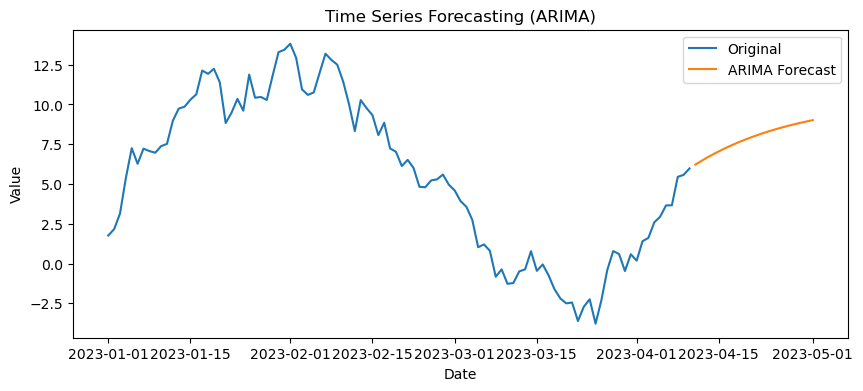

In [11]:
#Plot the original data and the forecasted values
plt.figure(figsize=(10, 4))
plt.plot(df['Value'], label='Original')
plt.plot(forecast, label='ARIMA Forecast')
plt.title('Time Series Forecasting (ARIMA)')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend(loc='best')
plt.show()

In [12]:
#Perform time series forecasting using SARIMA model
model_sarima = sm.tsa.SARIMAX(df['Value'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 7))
results_sarima = model_sarima.fit()
forecast_sarima = results_sarima.predict(start=100, end=120)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.40105D+00    |proj g|=  1.80138D-01

At iterate    5    f=  1.36608D+00    |proj g|=  6.71401D-02

At iterate   10    f=  1.36044D+00    |proj g|=  7.01614D-03

At iterate   15    f=  1.35919D+00    |proj g|=  1.49901D-02

At iterate   20    f=  1.35855D+00    |proj g|=  6.64899D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     23     26      1     0     0   2.826D-06   1.359D+00
  F =   1.3585488876347269     

CONVERG

/Users/robertwrobel/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/robertwrobel/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


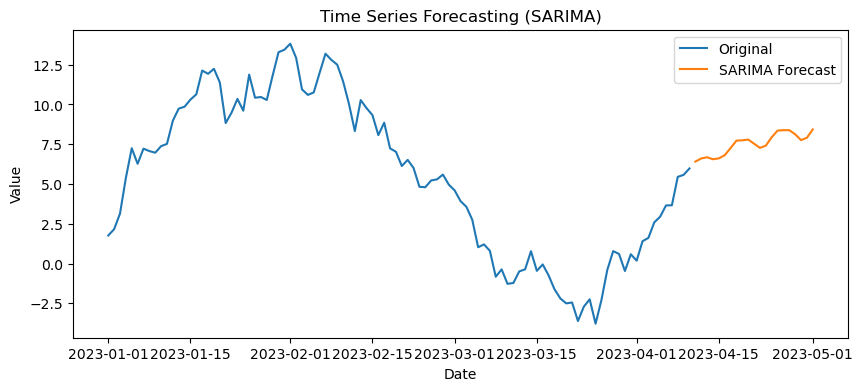

In [13]:
#Plot the original data and the SARIMA forecasted values
plt.figure(figsize=(10, 4))
plt.plot(df['Value'], label='Original')
plt.plot(forecast_sarima, label='SARIMA Forecast')
plt.title('Time Series Forecasting (SARIMA)')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend(loc='best')
plt.show()

In [14]:
#Perform exponential smoothing
model_ets = sm.tsa.ExponentialSmoothing(df['Value'], trend='add', seasonal='add', seasonal_periods=7)
results_ets = model_ets.fit()
forecast_ets = results_ets.predict(start=100, end=120)

/Users/robertwrobel/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


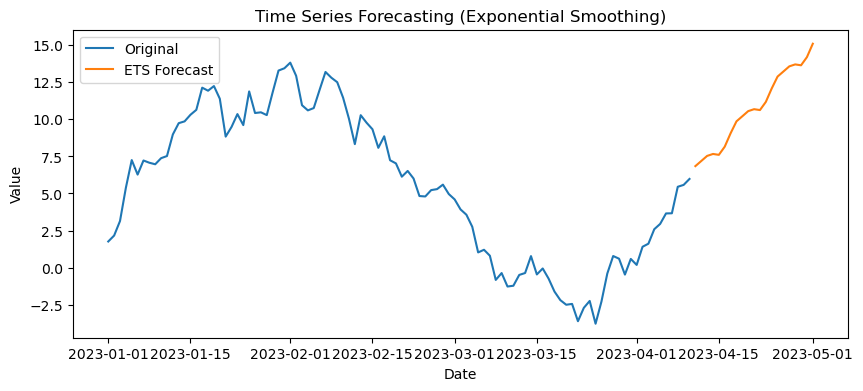

In [15]:
#Plot the original data and the exponential smoothing forecasted values
plt.figure(figsize=(10, 4))
plt.plot(df['Value'], label='Original')
plt.plot(forecast_ets, label='ETS Forecast')
plt.title('Time Series Forecasting (Exponential Smoothing)')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend(loc='best')
plt.show()

In [16]:
#Perform vector autoregression (VAR)
data = pd.DataFrame({'Value': df['Value'], 'Value Lag': df['Value'].shift(1)})
data.dropna(inplace=True)
model_var = sm.tsa.VAR(data)
results_var = model_var.fit()
forecast_var = results_var.forecast(data.values[-1:], steps=20)
print(forecast_var)

[[6.037829   5.98080155]
 [6.06675206 6.037829  ]
 [6.09280916 6.06675206]
 [6.11802552 6.09280916]
 [6.14257812 6.11802552]
 [6.16649645 6.14257812]
 [6.18979786 6.16649645]
 [6.21249832 6.18979786]
 [6.23461336 6.21249832]
 [6.25615805 6.23461336]
 [6.27714712 6.25615805]
 [6.29759489 6.27714712]
 [6.31751532 6.29759489]
 [6.33692201 6.31751532]
 [6.35582821 6.33692201]
 [6.37424683 6.35582821]
 [6.39219045 6.37424683]
 [6.4096713  6.39219045]
 [6.42670134 6.4096713 ]
 [6.44329217 6.42670134]]


/Users/robertwrobel/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


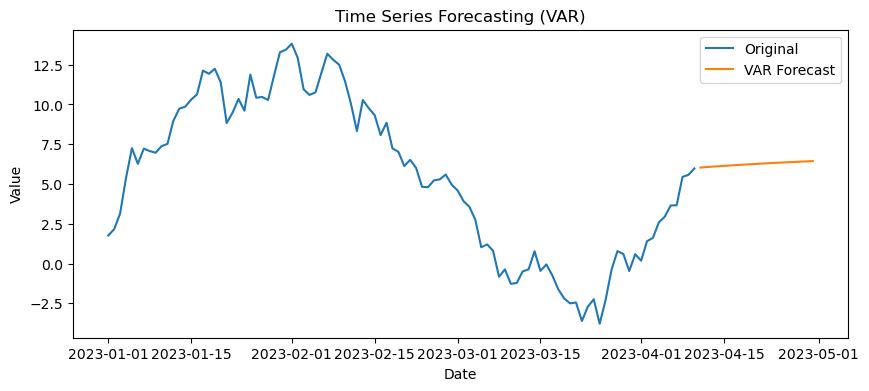

In [17]:
#Extract forecasted values for 'Value' variable
forecast_var_value = forecast_var[:, 0]
#In this line, we extract the forecasted values for the 'Value' variable from the forecast_var array. Since forecast_var contains the forecasted values for multiple variables in the VAR model, we use slicing with [:, 0] to extract the values only for the first variable (which is 'Value' in this case).

#Create a date range with the same length as forecasted values
date_range = pd.date_range(start=df.index[-1] + pd.DateOffset(days=1), periods=20, freq='D')

#Plot the original data and the VAR forecasted values
plt.figure(figsize=(10, 4))
plt.plot(df['Value'], label='Original')
plt.plot(date_range, forecast_var_value, label='VAR Forecast')
plt.title('Time Series Forecasting (VAR)')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend(loc='best')
plt.show()